<a href="https://colab.research.google.com/github/pgallino/TP2-DATOS-1C2023-MachineLearning-/blob/main/TP2_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO PRÁCTICO 2 - MACHINE LEARNING**

🟧 *SEPARACIÓN DE LOS DATOS* 🟧

En general, lo más adecuado es separar el dataset en 80% "train", 10% "validation" y 10% "test". En "train" se entrenan los datos, en "validation" se ajustan los hiperparámetros y encoding, y en "test" damos el resultado final.

En este trabajo, al utilizar RandomizedSearchCV sobre "train", no fue necesario disponer de "validation". RandomizedSearchCV se basa en K-Fold Cross Validation, con el enfoque Random-Search. K-Fold Cross Validation, sobre X_train obtiene los hiperparámetros óptimos.

Si decidiese testear por mi cuenta distintos hiperparámetros, debería contar con la separación "validation" y en ella ver los distintos resultados, para quedarme con la mejor combinación.

Por este motivo, los datos se separaron en "train" 80% y "test" 20%.

🟧 *FEATURE ENGINEERING* 🟧

Al contar con features categóricos, tuve que codificarlos.

Para ello apliqué One Hot Encoding, Binary Encoding y Mean Encoding con el siguiente criterio:

-Si el feature tiene muchas categorias -> Binary Encoding.

-Si el feature tiene pocas categorias -> One Hot Encoding.

-Como Mean Encoding no me genera mucha confianza (por el posible filtrado del target), solo lo apliqué una vez, a pedido de la consigna. El feature codificado bajo Mean Encoding se encuentra apartado en el final de la sección para poder correrlo con Binary Encoding en caso de quererlo (da mejor resultado).

Además para la inputación de NaNs utilicé el siguiente criterio:

-Si falta más del 50% de los datos -> relleno con una clase extra

-Si falta menos del 50% de los datos -> relleno con la clase más frecuente

-Si los Nans tienen sentido, haya los que haya -> relleno con clase extra para representarlos como categoría.


🟧 *BÚSQUEDA DE HIPERPARÁMETROS* 🟧

Como ya se aclaró, se utiliza RandomizedSearchCV.
La realidad es que con los hiperparámetros por default, los resultados finales son muy buenos. Por lo que tal vez, utilizar RandomizedSearchCV puede llegar a ser trabajo extra.

🟧 *RESULTADOS* 🟧

Se aplican distintas métricas sobre "test" y se grafican resultados.
Además se compara el modelo con otros, utilizando el mismo encoding y separación de datos.

🟦 En todos los modelos hago el encoding como si fuese la parte 4 del trabajo, para poder compararlos 🟦

# **SEPARO EL DATAFRAME EN TRAIN Y TEST**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/secondary_data.csv')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,capdiameter-,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


Separo la variable a predecir

In [ ]:
df['class'] = df['class'].map(lambda x: 0 if (x == 'p') else 1)

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

Separo 80% Train y 20% test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.count()

capdiameter-            48855
cap-shape               48855
cap-surface             37643
cap-color               48855
does-bruise-or-bleed    48855
gill-attachment         40971
gill-spacing            28867
gill-color              48855
stem-height             48855
stem-width              48855
stem-root                7604
stem-surface            18316
stem-color              48855
veil-type                2517
veil-color               5912
has-ring                48855
ring-type               46860
spore-print-color        5135
habitat                 48855
season                  48855
dtype: int64

In [ ]:
X_train.describe()

,capdiameter-,stem-height,stem-width
count,48855.000000,48855.000000,48855.000000
mean,6.755352,6.584611,12.179846
std,5.324369,3.361601,10.062846
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.220000
50%,5.870000,5.960000,10.210000
75%,8.555000,7.750000,16.600000
max,59.460000,33.920000,103.910000


# **FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from category_encoders.binary import BinaryEncoder
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**CAP-SHAPE**: tipo de forma de la tapa

bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o

In [ ]:
ohe_capshape = OneHotEncoder()
encoded_capshape = pd.DataFrame(ohe_capshape.fit_transform(X_train[['cap-shape']]).todense().astype(int))
encoded_capshape.columns = ohe_capshape.get_feature_names_out(['cap-shape'])

encoded_capshape_test = pd.DataFrame(ohe_capshape.transform(X_test[['cap-shape']]).todense().astype(int))
encoded_capshape_test.columns = ohe_capshape.get_feature_names_out(['cap-shape'])

X_train = X_train.reset_index().drop(['index', 'cap-shape'],axis=1).join(encoded_capshape)
X_test = X_test.reset_index().drop(['index', 'cap-shape'],axis=1).join(encoded_capshape_test)

In [ ]:
X_train

,capdiameter-,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,...,spore-print-color,habitat,season,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x
0,7.87,h,o,f,s,NaN,n,9.49,12.09,NaN,...,NaN,d,a,0,0,1,0,0,0,0
1,2.76,d,n,f,p,NaN,e,4.19,8.59,NaN,...,NaN,d,a,0,0,0,0,0,0,1
2,3.00,t,n,f,s,c,p,4.87,8.15,NaN,...,NaN,d,a,0,0,0,0,0,0,1
3,6.14,g,n,f,e,NaN,w,7.20,13.51,NaN,...,NaN,d,a,0,0,0,0,0,0,1
4,10.55,y,y,f,a,c,n,12.10,14.13,NaN,...,NaN,d,u,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,13.81,k,n,t,p,NaN,y,10.06,31.63,c,...,NaN,d,a,0,0,0,0,0,0,1
48851,2.69,d,w,f,d,d,p,3.76,2.41,NaN,...,NaN,g,a,0,0,0,0,0,0,1
48852,11.70,NaN,g,f,s,c,u,7.36,20.73,NaN,...,NaN,l,a,0,0,1,0,0,0,0
48853,2.83,w,u,f,a,c,u,5.76,5.59,NaN,...,NaN,d,a,0,0,0,0,0,1,0


## **CAP-SURFACE**: tipo se superficie de la tapa FALTAN DATOS ❗23.1%

fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,:

In [ ]:
X_train['cap-surface'].count()

37643

Como faltan datos, 37526 de 48885 -> 77%, relleno con el máximo.

In [ ]:
X_train['cap-surface'].value_counts()

t    6607
s    6098
y    5062
h    3962
g    3783
d    3562
e    2068
k    1842
i    1788
w    1750
l    1121
Name: cap-surface, dtype: int64

In [ ]:
X_train['cap-surface'] = X_train['cap-surface'].fillna('t')
X_test['cap-surface'] = X_test['cap-surface'].fillna('t')

In [ ]:
ohe_capsurface = OneHotEncoder()
encoded_capsurface = pd.DataFrame(ohe_capsurface.fit_transform(X_train[['cap-surface']]).todense().astype(int))
encoded_capsurface.columns = ohe_capsurface.get_feature_names_out(['cap-surface'])

encoded_capsurface_test = pd.DataFrame(ohe_capsurface.transform(X_test[['cap-surface']]).todense().astype(int))
encoded_capsurface_test.columns = ohe_capsurface.get_feature_names_out(['cap-surface'])

X_train = X_train.reset_index().drop(['index', 'cap-surface'],axis=1).join(encoded_capsurface)
X_test = X_test.reset_index().drop(['index', 'cap-surface'],axis=1).join(encoded_capsurface_test)

## **CAP-COLOR** Color de la tapa

brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k

In [ ]:
X_train['cap-color'].count()

48855

In [ ]:
be_capcolor = BinaryEncoder()

encoded_capcolor = be_capcolor.fit_transform(X_train[['cap-color']])
encoded_capcolor_test = be_capcolor.transform(X_test[['cap-color']])

X_train = X_train.reset_index().drop(['index', 'cap-color'],axis=1).join(encoded_capcolor)
X_test = X_test.reset_index().drop(['index', 'cap-color'],axis=1).join(encoded_capcolor_test)

##**DOES-BRUISE-OR-BLEED** Si tiene moretones o sangrado

bruises-or-bleeding=t,no=f

In [ ]:
X_train['does-bruise-or-bleed'].count()

48855

In [ ]:
ohe_bruisebleed = OneHotEncoder()
encoded_bruisebleed = pd.DataFrame(ohe_bruisebleed.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int))
encoded_bruisebleed.columns = ohe_bruisebleed.get_feature_names_out(['does-bruise-or-bleed'])

encoded_bruisebleed_test = pd.DataFrame(ohe_bruisebleed.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int))
encoded_bruisebleed_test.columns = ohe_bruisebleed.get_feature_names_out(['does-bruise-or-bleed'])

X_train = X_train.reset_index().drop(['index', 'does-bruise-or-bleed'],axis=1).join(encoded_bruisebleed)
X_test = X_test.reset_index().drop(['index', 'does-bruise-or-bleed'],axis=1).join(encoded_bruisebleed_test)

In [ ]:
X_train

,capdiameter-,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,...,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_0,cap-color_1,cap-color_2,cap-color_3,does-bruise-or-bleed_f,does-bruise-or-bleed_t
0,7.87,s,NaN,n,9.49,12.09,NaN,t,n,NaN,...,0,0,0,0,0,0,0,1,1,0
1,2.76,p,NaN,e,4.19,8.59,NaN,NaN,n,NaN,...,0,0,0,0,0,0,1,0,1,0
2,3.00,s,c,p,4.87,8.15,NaN,NaN,w,NaN,...,0,1,0,0,0,0,1,0,1,0
3,6.14,e,NaN,w,7.20,13.51,NaN,y,w,u,...,0,0,0,0,0,0,1,0,1,0
4,10.55,a,c,n,12.10,14.13,NaN,y,y,NaN,...,0,0,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,13.81,p,NaN,y,10.06,31.63,c,NaN,y,NaN,...,0,0,0,0,0,0,1,0,0,1
48851,2.69,d,d,p,3.76,2.41,NaN,h,w,NaN,...,0,0,0,0,0,1,1,0,1,0
48852,11.70,s,c,u,7.36,20.73,NaN,NaN,b,NaN,...,0,1,0,0,1,0,0,0,1,0
48853,2.83,a,c,u,5.76,5.59,NaN,s,u,NaN,...,0,0,1,0,0,1,1,1,1,0


##**GILL-ATTACHMENT**  FALTAN DATOS ❗16.2%

adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?


In [ ]:
X_train['gill-attachment'].value_counts()

a    10113
d     8257
x     5946
p     4852
s     4506
e     4495
f     2802
Name: gill-attachment, dtype: int64

In [ ]:
X_train['gill-attachment'] = X_train['gill-attachment'].fillna('a')
X_test['gill-attachment'] = X_test['gill-attachment'].fillna('a')

In [ ]:
ohe_gillattachment = OneHotEncoder()
encoded_gillattachment = pd.DataFrame(ohe_gillattachment.fit_transform(X_train[['gill-attachment']]).todense().astype(int))
encoded_gillattachment.columns = ohe_gillattachment.get_feature_names_out(['gill-attachment'])

encoded_gillattachment_test = pd.DataFrame(ohe_gillattachment.transform(X_test[['gill-attachment']]).todense().astype(int))
encoded_gillattachment_test.columns = ohe_gillattachment.get_feature_names_out(['gill-attachment'])

X_train = X_train.reset_index().drop(['index', 'gill-attachment'],axis=1).join(encoded_gillattachment)
X_test = X_test.reset_index().drop(['index', 'gill-attachment'],axis=1).join(encoded_gillattachment_test)

## **GILL-SPACING** Espacio de las "branquias" FALTAN DATOS ❗41%

Como faltan datos, 28707 de 48885 -> 58%, relleno con la clase maxima

In [ ]:
X_train['gill-spacing'].value_counts()

c    19799
d     6266
f     2802
Name: gill-spacing, dtype: int64

In [ ]:
X_train['gill-spacing'] = X_train['gill-spacing'].fillna('c')
X_test['gill-spacing'] = X_test['gill-spacing'].fillna('c')

In [ ]:
ohe_gillspacing = OneHotEncoder()
encoded_gillspacing = pd.DataFrame(ohe_gillspacing.fit_transform(X_train[['gill-spacing']]).todense().astype(int))
encoded_gillspacing.columns = ohe_gillspacing.get_feature_names_out(['gill-spacing'])


encoded_gillspacing_test = pd.DataFrame(ohe_gillspacing.transform(X_test[['gill-spacing']]).todense().astype(int))
encoded_gillspacing_test.columns = ohe_gillspacing.get_feature_names_out(['gill-spacing'])

X_train = X_train.reset_index().drop(['index', 'gill-spacing'],axis=1).join(encoded_gillspacing)
X_test = X_test.reset_index().drop(['index', 'gill-spacing'],axis=1).join(encoded_gillspacing_test)

##**STEM-COLOR** Color del tallo

see cap-color + none=f

In [ ]:
X_train['stem-color'].count()

48855

In [ ]:
be_stemcolor = BinaryEncoder()

encoded_stemcolor = be_stemcolor.fit_transform(X_train[['stem-color']])
encoded_stemcolor_test = be_stemcolor.transform(X_test[['stem-color']])

X_train = X_train.reset_index().drop(['index', 'stem-color'],axis=1).join(encoded_stemcolor)
X_test = X_test.reset_index().drop(['index', 'stem-color'],axis=1).join(encoded_stemcolor_test)

## **STEM-SURFACE** Superficie del tallo FALTAN DATOS ❗ 62.4%

see cap-surface + none=f

Como faltan datos, 18411 de 48885 -> 38%, relleno con nueva clase 'unknown'

In [ ]:
X_train['stem-surface'].value_counts()

s    4825
y    3907
i    3525
t    2137
g    1407
k    1265
f     824
h     426
Name: stem-surface, dtype: int64

In [ ]:
X_train['stem-surface'] = X_train['stem-surface'].map(lambda x : '?' if(pd.isna(x)) else x)
X_test['stem-surface'] = X_test['stem-surface'].map(lambda x : '?' if(pd.isna(x)) else x)

In [ ]:
ohe_stemsurface = OneHotEncoder()
encoded_stemsurface = pd.DataFrame(ohe_stemsurface.fit_transform(X_train[['stem-surface']]).todense().astype(int))
encoded_stemsurface.columns = ohe_stemsurface.get_feature_names_out(['stem-surface'])

encoded_stemsurface_test = pd.DataFrame(ohe_stemsurface.transform(X_test[['stem-surface']]).todense().astype(int))
encoded_stemsurface_test.columns = ohe_stemsurface.get_feature_names_out(['stem-surface'])

X_train = X_train.reset_index().drop(['index', 'stem-surface'],axis=1).join(encoded_stemsurface)
X_test = X_test.reset_index().drop(['index', 'stem-surface'],axis=1).join(encoded_stemsurface_test)

##**STEM-ROOT** Raiz del tallo FALTAN DATOS ❗84.4%

bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r


Como faltan datos, 7729 de 48885 -> 16%, relleno con nueva clase 'unknown'.

In [ ]:
X_train['stem-root'].value_counts()

s    2541
b    2507
r    1142
f     824
c     590
Name: stem-root, dtype: int64

In [ ]:
X_train['stem-root'] = X_train['stem-root'].fillna('?')
X_test['stem-root'] = X_test['stem-root'].fillna('?')

In [ ]:
ohe_stemroot = OneHotEncoder()
encoded_stemroot = pd.DataFrame(ohe_stemroot.fit_transform(X_train[['stem-root']]).todense().astype(int))
encoded_stemroot.columns = ohe_stemroot.get_feature_names_out(['stem-root'])


encoded_stemroot_test = pd.DataFrame(ohe_stemroot.transform(X_test[['stem-root']]).todense().astype(int))
encoded_stemroot_test.columns = ohe_stemroot.get_feature_names_out(['stem-root'])

X_train = X_train.reset_index().drop(['index', 'stem-root'],axis=1).join(encoded_stemroot)
X_test = X_test.reset_index().drop(['index', 'stem-root'],axis=1).join(encoded_stemroot_test)

##**VEIL-TYPE**: tipo de velo FALTAN DATOS ❗94.8%

partial=p, universal=u

Como faltan datos, 2573 de 48885 -> 5%, relleno con nueva clase 'unknown'.

In [ ]:
X_train['veil-type'].value_counts()

u    2517
Name: veil-type, dtype: int64

In [ ]:
X_train['veil-type'] = X_train['veil-type'].fillna('?')
X_test['veil-type'] = X_test['veil-type'].fillna('?')

In [ ]:
ohe_veiltype = OneHotEncoder()
encoded_veiltype = pd.DataFrame(ohe_veiltype.fit_transform(X_train[['veil-type']]).todense().astype(int))
encoded_veiltype.columns = ohe_veiltype.get_feature_names_out(['veil-type'])


encoded_veiltype_test = pd.DataFrame(ohe_veiltype.transform(X_test[['veil-type']]).todense().astype(int))
encoded_veiltype_test.columns = ohe_veiltype.get_feature_names_out(['veil-type'])

X_train = X_train.reset_index().drop(['index', 'veil-type'],axis=1).join(encoded_veiltype)
X_test = X_test.reset_index().drop(['index', 'veil-type'],axis=1).join(encoded_veiltype_test)

 ## **VEIL-COLOR** Color del velo FALTAN DATOS ❗87.9%

 cap-color + none=f

Como faltan datos, 5983 de 48885 -> 12%, relleno con nueva clase 'unknown'.

In [ ]:
X_train['veil-color'].value_counts()

w    4327
y     436
n     435
k     294
u     277
e     143
Name: veil-color, dtype: int64

In [ ]:
X_train['veil-color'] = X_train['veil-color'].fillna('?')
X_test['veil-color'] = X_test['veil-color'].fillna('?')

In [ ]:
be_veilcolor = BinaryEncoder()

encoded_veilcolor = be_veilcolor.fit_transform(X_train[['veil-color']])
encoded_veilcolor_test = be_veilcolor.transform(X_test[['veil-color']])

X_train = X_train.reset_index().drop(['index', 'veil-color'],axis=1).join(encoded_veilcolor)
X_test = X_test.reset_index().drop(['index', 'veil-color'],axis=1).join(encoded_veilcolor_test)

## **RING-TYPE**: Tipo de anillo FALTAN DATOS ❗0.04%

cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?

Como faltan datos, 46874 de 48885 -> 96%, relleno con nueva clase 'unknown' porque los nan que faltan representan algo en este caso.

In [ ]:
X_train['ring-type'].value_counts()

f    38737
e     1921
z     1679
l     1157
r     1138
p      991
g      961
m      276
Name: ring-type, dtype: int64

In [ ]:
X_train['ring-type'] = X_train['ring-type'].fillna('f')
X_test['ring-type'] = X_test['ring-type'].fillna('f')

In [ ]:
be_ringtype = BinaryEncoder()

encoded_ringtype = be_ringtype.fit_transform(X_train[['ring-type']])
encoded_ringtype_test = be_ringtype.transform(X_test[['ring-type']])

X_train = X_train.reset_index().drop(['index', 'ring-type'],axis=1).join(encoded_ringtype)
X_test = X_test.reset_index().drop(['index', 'ring-type'],axis=1).join(encoded_ringtype_test)

##**SPORE-PRINT-COLOR**  Color print esporas FALTAN DATOS ❗89.6%

see cap color

Como faltan datos, 5084 de 48885 -> 10%, relleno con nueva clase 'unknown'

In [ ]:
X_train['spore-print-color'].value_counts()

k    1720
p    1015
w     990
n     855
g     281
r     143
u     131
Name: spore-print-color, dtype: int64

In [ ]:
X_train['spore-print-color'] = X_train['spore-print-color'].fillna('?')
X_test['spore-print-color'] = X_test['spore-print-color'].fillna('?')

In [ ]:
ohe_sporeprint = OneHotEncoder()
encoded_sporeprint = pd.DataFrame(ohe_sporeprint.fit_transform(X_train[['spore-print-color']]).todense().astype(int))
encoded_sporeprint.columns = ohe_sporeprint.get_feature_names_out(['spore-print-color'])


encoded_sporeprint_test = pd.DataFrame(ohe_sporeprint.transform(X_test[['spore-print-color']]).todense().astype(int))
encoded_sporeprint_test.columns = ohe_sporeprint.get_feature_names_out(['spore-print-color'])

X_train = X_train.reset_index().drop(['index', 'spore-print-color'],axis=1).join(encoded_sporeprint)
X_test = X_test.reset_index().drop(['index', 'spore-print-color'],axis=1).join(encoded_sporeprint_test)

##**HAS-RING** Tiene anillo

 ring=t, none=f

In [ ]:
X_train['has-ring'].value_counts()

f    36758
t    12097
Name: has-ring, dtype: int64

In [ ]:
ohe_hasring = OneHotEncoder()
encoded_hasring = pd.DataFrame(ohe_hasring.fit_transform(X_train[['has-ring']]).todense().astype(int))
encoded_hasring.columns = ohe_hasring.get_feature_names_out(['has-ring'])


encoded_hasring_test = pd.DataFrame(ohe_hasring.transform(X_test[['has-ring']]).todense().astype(int))
encoded_hasring_test.columns = ohe_hasring.get_feature_names_out(['has-ring'])

X_train = X_train.reset_index().drop(['index', 'has-ring'],axis=1).join(encoded_hasring)
X_test = X_test.reset_index().drop(['index', 'has-ring'],axis=1).join(encoded_hasring_test)

##**HABITAT** Hábitat del hongo

grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d

In [ ]:
X_train['habitat'].value_counts()

d    35339
g     6375
l     2526
m     2332
h     1615
p      290
w      286
u       92
Name: habitat, dtype: int64

In [ ]:
ohe_habitat = OneHotEncoder()
encoded_habitat = pd.DataFrame(ohe_habitat.fit_transform(X_train[['habitat']]).todense().astype(int))
encoded_habitat.columns = ohe_habitat.get_feature_names_out(['habitat'])


encoded_habitat_test = pd.DataFrame(ohe_habitat.transform(X_test[['habitat']]).todense().astype(int))
encoded_habitat_test.columns = ohe_habitat.get_feature_names_out(['habitat'])

X_train = X_train.reset_index().drop(['index', 'habitat'],axis=1).join(encoded_habitat)
X_test = X_test.reset_index().drop(['index', 'habitat'],axis=1).join(encoded_habitat_test)

##**SEASON** Estación del hongo

spring=s, summer=u, autumn=a, winter=w

In [ ]:
X_train['season'].value_counts()

a    24167
u    18353
w     4205
s     2130
Name: season, dtype: int64

In [ ]:
ohe_season = OneHotEncoder()
encoded_season = pd.DataFrame(ohe_season.fit_transform(X_train[['season']]).todense().astype(int))
encoded_season.columns = ohe_season.get_feature_names_out(['season'])


encoded_season_test = pd.DataFrame(ohe_season.transform(X_test[['season']]).todense().astype(int))
encoded_season_test.columns = ohe_season.get_feature_names_out(['season'])

X_train = X_train.reset_index().drop(['index', 'season'],axis=1).join(encoded_season)
X_test = X_test.reset_index().drop(['index', 'season'],axis=1).join(encoded_season_test)

##**GILL-COLOR** color de las "branquias"

see cap-color + none=f

In [ ]:
X_train['gill-color'].count()

48855

### MEAN ENCODING

In [ ]:
column_train = pd.DataFrame(X_train['gill-color'])
mean_encoding_train = column_train.join(y_train)
mean_encoding_train["mean_encoded"] = mean_encoding_train.groupby("gill-color")["class"].transform("mean")
X_train['gill-color'] = mean_encoding_train['mean_encoded']

column_test = pd.DataFrame(X_test['gill-color'])
mean_encoding_test = column_test.join(y_test)
mean_encoding_test["mean_encoded"] = mean_encoding_test.groupby("gill-color")["class"].transform("mean")
X_test['gill-color'] = mean_encoding_test['mean_encoded']

### BINARY ENCODING comentar el mean y descomentar binary

In [ ]:
#be_gillcolor = BinaryEncoder()

#encoded_gillcolor = be_gillcolor.fit_transform(X_train[['gill-color']])
#encoded_gillcolor_test = be_gillcolor.transform(X_test[['gill-color']])

#X_train = X_train.reset_index().drop(['index', 'gill-color'],axis=1).join(encoded_gillcolor)
#X_test = X_test.reset_index().drop(['index', 'gill-color'],axis=1).join(encoded_gillcolor_test)

# **RESULTADOS DEL ENCODING** 

In [ ]:
X_train

,capdiameter-,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_u,habitat_w,season_a,season_s,season_u,season_w,gill-color_0,gill-color_1,gill-color_2,gill-color_3
0,5.84,6.74,13.10,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,6.88,4.77,10.07,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,4.62,4.32,9.52,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,6.90,6.75,7.28,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,1.10,3.81,2.64,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,6.79,4.35,11.72,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
48851,3.75,5.05,10.62,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,1
48852,3.25,5.59,6.36,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
48853,2.46,3.25,3.50,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
X_train.columns

Index(['capdiameter-', 'stem-height', 'stem-width', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e',
       'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k',
       'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w',
       'cap-surface_y', 'cap-color_0', 'cap-color_1', 'cap-color_2',
       'cap-color_3', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'stem-color_0', 'stem-color_1', 'stem-color_2',
       'stem-color_3', 'stem-surface_?', 'stem-surface_f', 'stem-surface_g',
       'stem-surface_h', 'stem-surface_i', 'stem-surface_k', 'stem-surface_s',
       'stem-surface_t', 'stem-surface_y', 'stem-root_?', 'stem-root_

In [ ]:
X_train.describe()

,capdiameter-,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_u,habitat_w,season_a,season_s,season_u,season_w,gill-color_0,gill-color_1,gill-color_2,gill-color_3
count,48855.000000,48855.000000,48855.000000,48855.00000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.00000,...,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000,48855.000000
mean,6.722074,6.590447,12.156736,0.09387,0.029577,0.218749,0.055347,0.041899,0.117777,0.44278,...,0.002026,0.005834,0.494238,0.043762,0.375274,0.086726,0.261713,0.195681,0.579756,0.536895
std,5.228843,3.348631,10.062395,0.29165,0.169420,0.413402,0.228660,0.200362,0.322347,0.49672,...,0.044970,0.076156,0.499972,0.204568,0.484198,0.281436,0.439572,0.396728,0.493603,0.498642
min,0.380000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.490000,4.655000,5.220000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.870000,5.960000,10.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,8.530000,7.760000,16.570000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,59.460000,33.920000,103.910000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48855 entries, 0 to 48854
Data columns (total 91 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capdiameter-            48855 non-null  float64
 1   stem-height             48855 non-null  float64
 2   stem-width              48855 non-null  float64
 3   cap-shape_b             48855 non-null  int64  
 4   cap-shape_c             48855 non-null  int64  
 5   cap-shape_f             48855 non-null  int64  
 6   cap-shape_o             48855 non-null  int64  
 7   cap-shape_p             48855 non-null  int64  
 8   cap-shape_s             48855 non-null  int64  
 9   cap-shape_x             48855 non-null  int64  
 10  cap-surface_d           48855 non-null  int64  
 11  cap-surface_e           48855 non-null  int64  
 12  cap-surface_g           48855 non-null  int64  
 13  cap-surface_h           48855 non-null  int64  
 14  cap-surface_i           48855 non-null

YA TENGO ENCODEADO EL DATASET PARA PODER APLICAR LOS MODELOS.

#XGBOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
xg_reg = XGBClassifier()
params = [
    {'colsample_bytree' : [0.1, 0.3, 0.5]}, 
    {'learning_rate' : [0.1, 0.2, 0.3]},
    {'max_depth' : [2, 5, 10]}, 
    {'alpha' : [8, 10, 12]},
    {'n_estimators' : [5, 10, 15]},
]
rs = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=5, random_state=1, scoring='roc_auc')
rs.fit(X_train, y_train)
model = rs.best_estimator_
model.fit(X_train, y_train)
rs.best_params_

{'colsample_bytree': 0.5}

#**MÉTRICAS DE ERROR**

In [ ]:
y_pred = model.predict(X_test)
y_test = y_test.astype(int)
cm = confusion_matrix(y_test, y_pred)
cm

array([[6663,  146],
       [  12, 5393]])

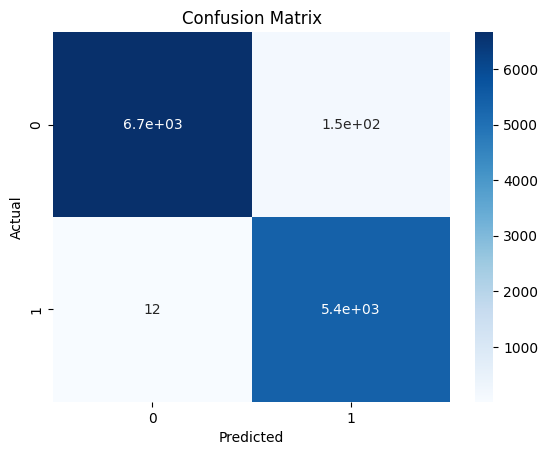

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.9870640248894711

In [ ]:
specificity_score = cm[0][0] / sum(cm[0])
specificity_score

0.9785577911587605

In [ ]:
sensibility_score = cm[1][1] / sum(cm[1])
sensibility_score

0.9977798334875115

In [ ]:
y_pred = y_pred.astype(str)
y_test = y_test.astype(str)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

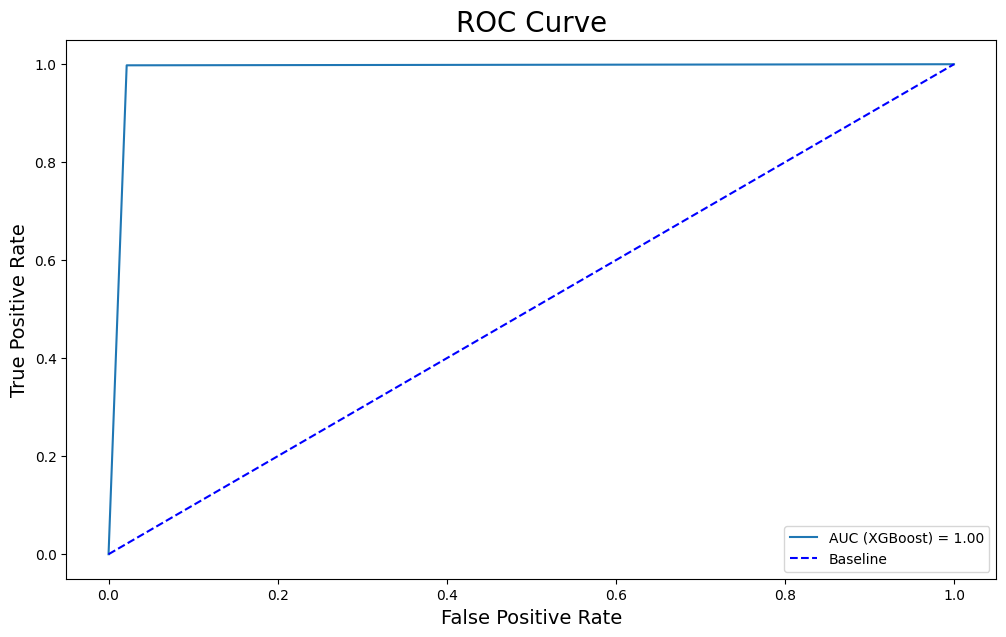

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (XGBoost) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

🟪 ¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?) 🟪 

In [ ]:
auc

0.999721107001956

Obtuve un auc de 0.9997, muy cercano al 1. Por lo hablado en la clase de consulta del tp (https://www.youtube.com/watch?v=WnOQgYbZEtU&t=1680s minuto 22:00) supongo que se me pregunta sobre el dataset para testear. En mi caso separé aleatoriamente los datos, dejando un 80% en Train y 20% en Test. Como no hay cuestiones de tiempo, el orden no importa, y puedo tomar de forma aleatoria. De todas formas si hablamos de validation, al hacer RandomizedSearchCV va tomando particiones "folds" sobre X_train. Entrena a un grupo de X_train y valida sobre el que separó de X_train. Lo hace varias veces tomando distintos folds para entrenar y validar.

#**FEATURE IMPORTANCE**

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_feature_importance = pd.DataFrame(X_train.columns, columns=['feature'])
df_feature_importance['importance'] = model.feature_importances_
df_feature_importance['feature'] = df_feature_importance['feature'].map(lambda x: x if (x == 'capdiameter-' or x == 'stem-height' or x == 'stem-width' or x == 'gill-color') else x[:-2])
df_feature_importance = df_feature_importance.groupby('feature').agg('sum')
df_feature_importance = df_feature_importance.sort_values(by='importance', ascending = False).reset_index()

In [ ]:
df_feature_importance.head(15)

,feature,importance
0,cap-surface,0.152197
1,stem-root,0.112054
2,stem-surface,0.093275
3,gill-attachment,0.090926
4,spore-print-color,0.066366
5,cap-shape,0.058456
6,ring-type,0.055690
7,habitat,0.054932
8,gill-spacing,0.043211
9,cap-color,0.041770


<Axes: xlabel='importance', ylabel='feature'>

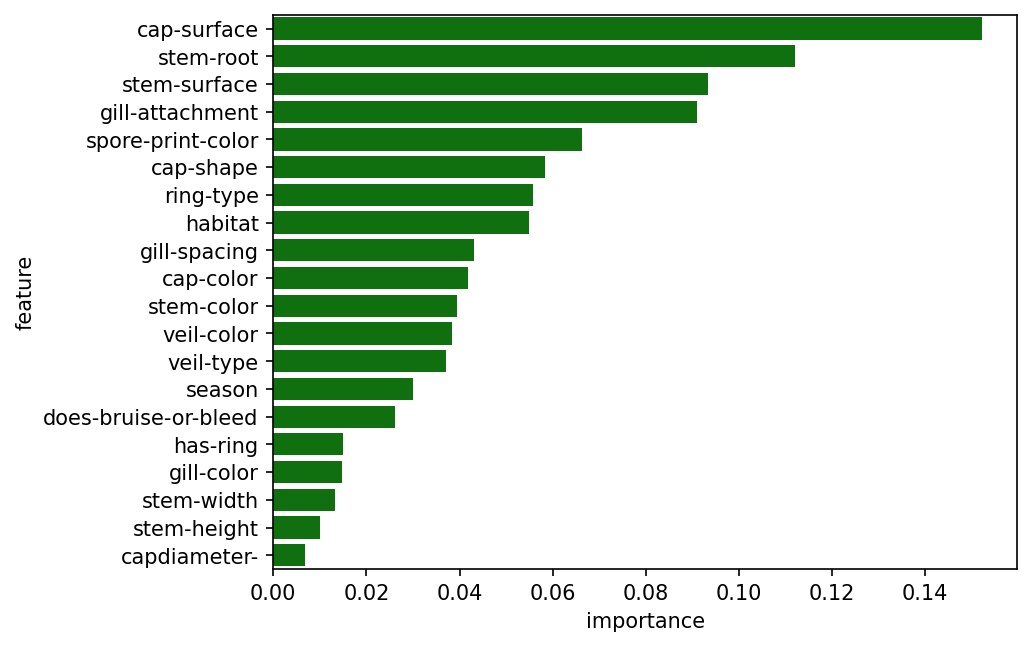

In [ ]:
plt.figure(dpi=150)
sns.barplot(data=df_feature_importance, x='importance', y='feature', color='green')

# COMPARO CON OTROS MODELOS

🟪 ¿Por qué cree que logro/no logro el mismo valor de AUC que con Random Forest? 🟪

Considero que son dos modelos distintos, con distintos procedimientos. Observando la feature importance, se puede notar que toman distintos criterios. Tomando distintos criterios es posible que no se llegue al mismo resultado. De todas formas llegaron a resultados muy buenos los dos, casi 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression(random_state=1).fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_test = y_test.astype(int)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred)

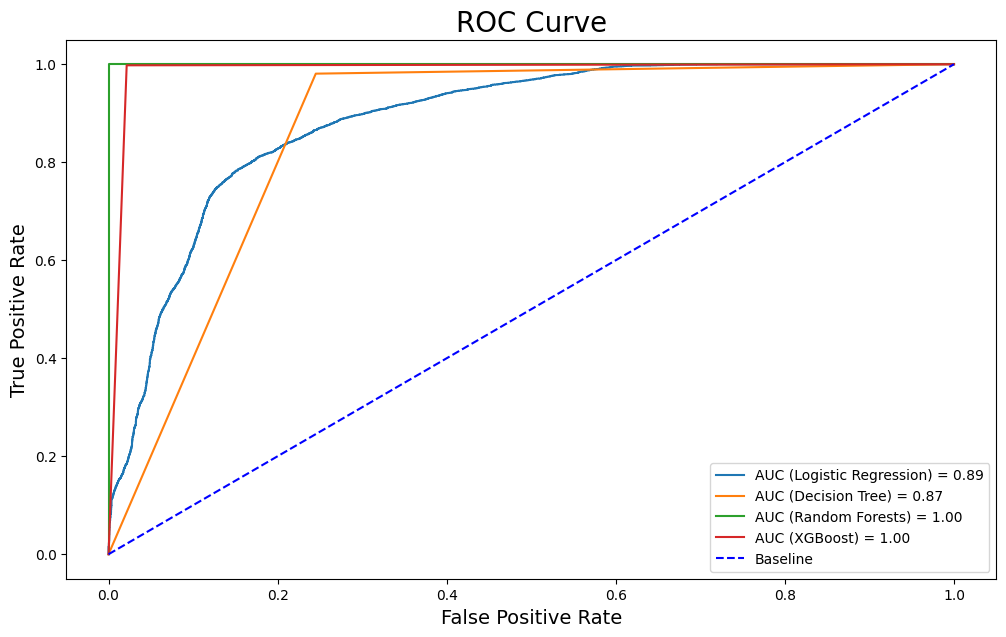

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [ ]:
auc

0.999721107001956

# **GUARDO EL RESULTADO A CSV**

In [ ]:
pd.DataFrame(y_pred).to_csv('/content/drive/MyDrive/test_XG.csv')

https://drive.google.com/file/d/1LVzX8JvNiMO6RBaGgEiKiEg4-vvMjA4t/view?usp=sharing